# Introduction
- The goal of this section is to train a convolutional neural network on custom images (radiographss) from scratch. To achieve this, there are few operations we need to perform, which includes:
  - Connecting google colab to our google drive
  - Data Preparation: creating training and test data from the raw data
  - Building the CNN architecture
  - Training the network with and without transfer learning using pretrained models such as Vgg16, ResNet50, DenseNet121, MobileNetV1 and EfficientNet


- Dataset:https://stanfordmlgroup.github.io/competitions/mura/

In [ ]:
# Connect Google Colab to Google Drive
# from google.colab import drive
# drive.mount("/content/drive")

In [1]:
# install opencv-python
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# install keras-tuner

!pip install keras-tuner


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# smalldataset 64 multiclass train-test split

In [3]:
# import the required libraries
import cv2
import numpy as np
import os
import shutil
import random

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from tensorflow import keras
import keras_tuner as kt

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [4]:
# Prepare training and testing images

def create_directory(train, test, category):
  if not os.path.exists(train):
    os.makedirs(train) # create train directory
  if not os.path.exists(test):
    os.makedirs(test) # create test directory
  if not os.path.exists(os.path.join(train, category)):
    os.makedirs(os.path.join(train, category))
  if not os.path.exists(os.path.join(test, category)):
    os.makedirs(os.path.join(test, category))

In [5]:
# path to the images

input_dir = r"C:\Users\OLASUNKANMI\Desktop\UoL DS Course files\Semester C\UoL Research Project Materials\New_Mura\small_dataset\64\Multiclass"

os.listdir(input_dir)

['XR_ELBOW',
 'XR_FINGER',
 'XR_FOREARM',
 'XR_HAND',
 'XR_HUMERUS',
 'XR_SHOULDER',
 'XR_WRIST']

In [6]:
# creation of train and test directories

def get_image(input_dir, category):
  # image directory
  img_dir = os.path.join(input_dir, category)

  # define the percentage of images to use for testing
  test_percent = 0.3

  # sanity for image format
  image_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f)) and f.endswith(".png")]

  # shuffle the images
  random.shuffle(image_files)

  # calculate the number of images to use for training and testing
  num_images = len(image_files)
  num_test = int(test_percent * num_images)
  num_train = num_images - num_test

  # create paths to training and testing
  train_dir = os.path.join(input_dir, "train")
  test_dir = os.path.join(input_dir, "test")

  # create actual training and testing directories
  create_directory(train_dir, test_dir, category)

  # copy the image to the training and testing directories
  for i in range(num_images):
    img_file = image_files[i]

    if i < num_train:
      shutil.copy(img_file, os.path.join(train_dir, category))

    else:
      shutil.copy(img_file, os.path.join(test_dir, category))

In [7]:
# categorizing negative and positive images into the train and test directories
categories = os.listdir(input_dir)

for category in categories:
  get_image(input_dir, category)

In [8]:
# check the size of the images
def checkImageSize(dir, category):
  cat_path = os.path.join(dir, category)
  images = os.listdir(cat_path)
  print(len(images))

  for i in range(5):
    img = images[i]
    image = cv2.imread(os.path.join(cat_path, img))
    print(image.shape)

In [9]:
# path to images in the train directory
train_dir = r"C:\Users\OLASUNKANMI\Desktop\UoL DS Course files\Semester C\UoL Research Project Materials\New_Mura\small_dataset\64\Multiclass\train"

In [10]:
checkImageSize(train_dir, "XR_ELBOW")

140
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [11]:
checkImageSize(train_dir, "XR_FINGER")

140
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [12]:
checkImageSize(train_dir, "XR_FOREARM")

140
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [13]:
checkImageSize(train_dir, "XR_HAND")

140
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [14]:
checkImageSize(train_dir, "XR_HUMERUS")

140
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [15]:
checkImageSize(train_dir, "XR_SHOULDER")

140
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [16]:
checkImageSize(train_dir, "XR_WRIST")

140
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [17]:
# path to images in the train directory
test_dir = r"C:\Users\OLASUNKANMI\Desktop\UoL DS Course files\Semester C\UoL Research Project Materials\New_Mura\small_dataset\64\Multiclass\test"

In [18]:
checkImageSize(test_dir, "XR_ELBOW")

60
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [19]:
checkImageSize(test_dir, "XR_FINGER")

60
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [20]:
checkImageSize(test_dir, "XR_FOREARM")

60
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [21]:
checkImageSize(test_dir, "XR_HAND")

60
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [22]:
checkImageSize(test_dir, "XR_HUMERUS")

60
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [23]:
checkImageSize(test_dir, "XR_SHOULDER")

60
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [24]:
checkImageSize(test_dir, "XR_WRIST")

60
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [2]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(142)
tf.random.set_seed(42)

# Smalldata 64 multiclass gridsearch (VGG16)

Found 686 images belonging to 7 classes.
Found 294 images belonging to 7 classes.
Found 420 images belonging to 7 classes.
Epoch 1/10
22/22 [==============================] - 140s 6s/step - loss: 1.8119 - accuracy: 0.3222 - val_loss: 1.3655 - val_accuracy: 0.5442
Epoch 2/10
22/22 [==============================] - 141s 6s/step - loss: 1.2326 - accuracy: 0.5598 - val_loss: 1.1985 - val_accuracy: 0.5850
Epoch 3/10
22/22 [==============================] - 192s 9s/step - loss: 1.1045 - accuracy: 0.6122 - val_loss: 1.1629 - val_accuracy: 0.5612
Epoch 4/10
22/22 [==============================] - 240s 11s/step - loss: 0.9490 - accuracy: 0.6735 - val_loss: 1.0484 - val_accuracy: 0.6327
Epoch 5/10
22/22 [==============================] - 236s 11s/step - loss: 0.8453 - accuracy: 0.7143 - val_loss: 1.0111 - val_accuracy: 0.6497
Epoch 6/10
22/22 [==============================] - 234s 11s/step - loss: 0.7524 - accuracy: 0.7318 - val_loss: 0.9678 - val_accuracy: 0.6599
Epoch 7/10
22/22 [==========

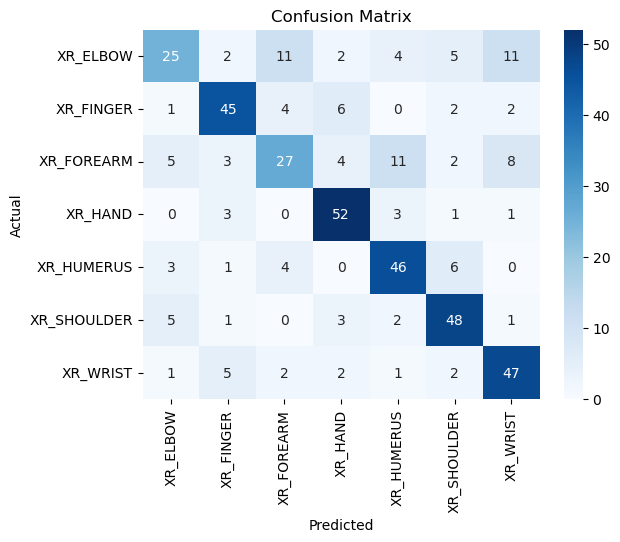

Sensitivity: [0.41666667 0.75       0.45       0.86666667 0.76666667 0.8
 0.78333333]
Specificity: [0.625      0.75       0.5625     0.75362319 0.68656716 0.72727273
 0.67142857]


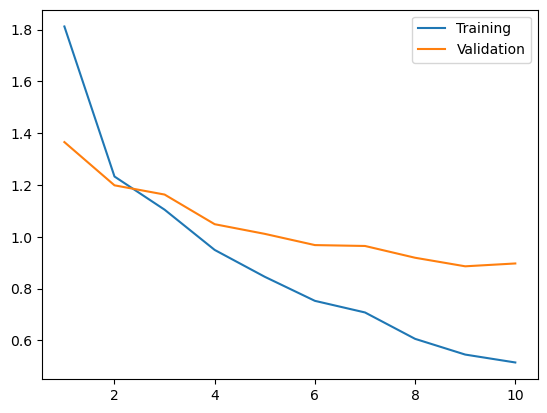

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Define paths
train_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/small_dataset/64/Multiclass/train"
test_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/small_dataset/64/Multiclass/test"


# Data Preprocessing
image_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Load VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False  # Freeze base model

# Add Custom Layers
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=out)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on Test Data
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate Sensitivity and Specificity
sensitivity = cm.diagonal() / cm.sum(axis=1)
specificity = cm.diagonal() / cm.sum(axis=0)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Visualize the loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label="Training")
plt.plot(epochs, val_loss, label="Validation")
plt.legend(loc="best")
plt.show()

# Smalldata 64 multiclass 5CV (VGG16)

Training fold 1/5
Found 686 images belonging to 7 classes.
Found 294 images belonging to 7 classes.
Epoch 1/10
22/22 [==============================] - 143s 7s/step - loss: 1.8189 - accuracy: 0.3149 - val_loss: 1.3262 - val_accuracy: 0.5306
Epoch 2/10
22/22 [==============================] - 146s 7s/step - loss: 1.2610 - accuracy: 0.5408 - val_loss: 1.1761 - val_accuracy: 0.5714
Epoch 3/10
22/22 [==============================] - 193s 9s/step - loss: 1.0917 - accuracy: 0.6385 - val_loss: 1.0678 - val_accuracy: 0.5986
Epoch 4/10
22/22 [==============================] - 218s 10s/step - loss: 0.9231 - accuracy: 0.6662 - val_loss: 1.0388 - val_accuracy: 0.5884
Epoch 5/10
22/22 [==============================] - 227s 10s/step - loss: 0.8814 - accuracy: 0.6953 - val_loss: 0.9947 - val_accuracy: 0.6565
Epoch 6/10
22/22 [==============================] - 246s 11s/step - loss: 0.7157 - accuracy: 0.7697 - val_loss: 0.9673 - val_accuracy: 0.6531
Epoch 7/10
22/22 [==============================] -

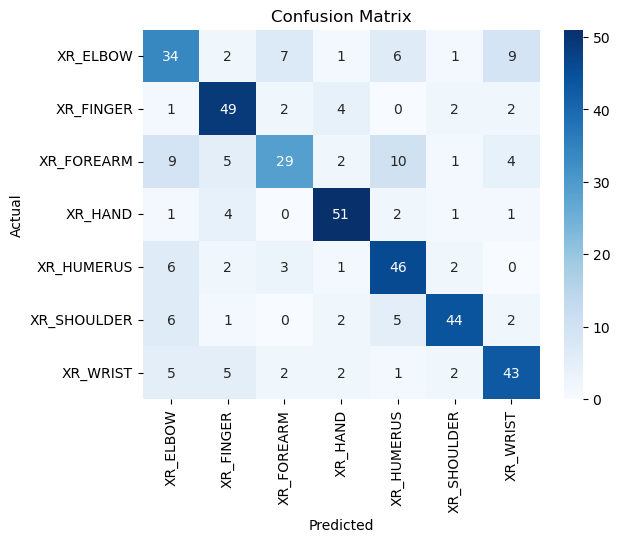

Sensitivity: [0.56666667 0.81666667 0.48333333 0.85       0.76666667 0.73333333
 0.71666667]
Specificity: [0.5483871  0.72058824 0.6744186  0.80952381 0.65714286 0.83018868
 0.70491803]


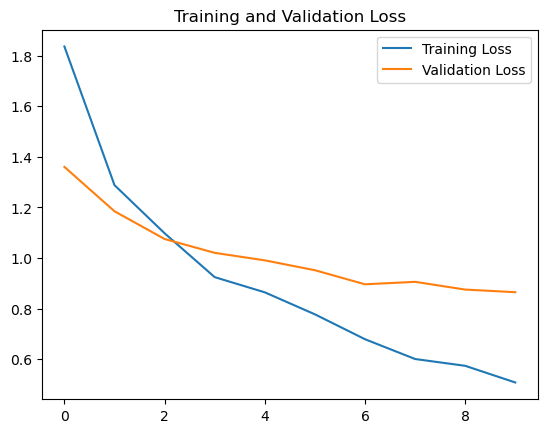

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold

# Define paths
train_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/small_dataset/64/Multiclass/train"
test_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/small_dataset/64/Multiclass/test"

# Data Preprocessing
image_size = (64, 64)
batch_size = 32
cv_folds = 5

# Image Data Generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
    base_model.trainable = False  # Freeze base model
    
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(7, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=out)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform Cross-Validation
kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(train_generator.filenames)):
    print(f"Training fold {fold+1}/{cv_folds}")
    
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')
    
    val_generator = datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')
    
    model = create_model()
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on Test Data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Sensitivity and Specificity
sensitivity = cm.diagonal() / cm.sum(axis=1)
specificity = cm.diagonal() / cm.sum(axis=0)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Loss Visualization
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Smalldata 64 multiclass 10CV (VGG16)

Training fold 1/10
Found 686 images belonging to 7 classes.
Found 294 images belonging to 7 classes.
Epoch 1/10
22/22 [==============================] - 801s 36s/step - loss: 1.8421 - accuracy: 0.3149 - val_loss: 1.3300 - val_accuracy: 0.5136
Epoch 2/10
22/22 [==============================] - 920s 42s/step - loss: 1.2793 - accuracy: 0.5175 - val_loss: 1.1859 - val_accuracy: 0.5612
Epoch 3/10
22/22 [==============================] - 2667s 125s/step - loss: 1.0161 - accuracy: 0.6429 - val_loss: 1.1136 - val_accuracy: 0.6054
Epoch 4/10
22/22 [==============================] - 416s 19s/step - loss: 0.9343 - accuracy: 0.6676 - val_loss: 1.0085 - val_accuracy: 0.6463
Epoch 5/10
22/22 [==============================] - 532s 25s/step - loss: 0.8128 - accuracy: 0.7070 - val_loss: 0.9687 - val_accuracy: 0.6769
Epoch 6/10
22/22 [==============================] - 727s 34s/step - loss: 0.7495 - accuracy: 0.7347 - val_loss: 0.9679 - val_accuracy: 0.6565
Epoch 7/10
22/22 [===========================

22/22 [==============================] - 662s 30s/step - loss: 0.9867 - accuracy: 0.6545 - val_loss: 1.0253 - val_accuracy: 0.6565
Epoch 5/10
22/22 [==============================] - 675s 31s/step - loss: 0.8461 - accuracy: 0.7245 - val_loss: 0.9808 - val_accuracy: 0.6599
Epoch 6/10
22/22 [==============================] - 697s 32s/step - loss: 0.7612 - accuracy: 0.7376 - val_loss: 0.9304 - val_accuracy: 0.6803
Epoch 7/10
22/22 [==============================] - 659s 30s/step - loss: 0.6816 - accuracy: 0.7741 - val_loss: 0.9189 - val_accuracy: 0.6497
Epoch 8/10
22/22 [==============================] - 672s 31s/step - loss: 0.6417 - accuracy: 0.7711 - val_loss: 0.8797 - val_accuracy: 0.6973
Epoch 9/10
22/22 [==============================] - 650s 30s/step - loss: 0.6061 - accuracy: 0.7872 - val_loss: 0.8901 - val_accuracy: 0.6735
Epoch 10/10
22/22 [==============================] - 656s 30s/step - loss: 0.5191 - accuracy: 0.8455 - val_loss: 0.8992 - val_accuracy: 0.6803
Training fold 7/

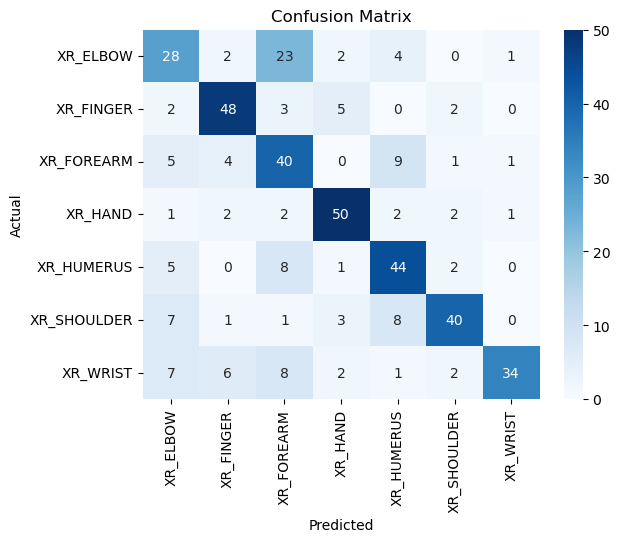

Sensitivity: [0.46666667 0.8        0.66666667 0.83333333 0.73333333 0.66666667
 0.56666667]
Specificity: [0.50909091 0.76190476 0.47058824 0.79365079 0.64705882 0.81632653
 0.91891892]


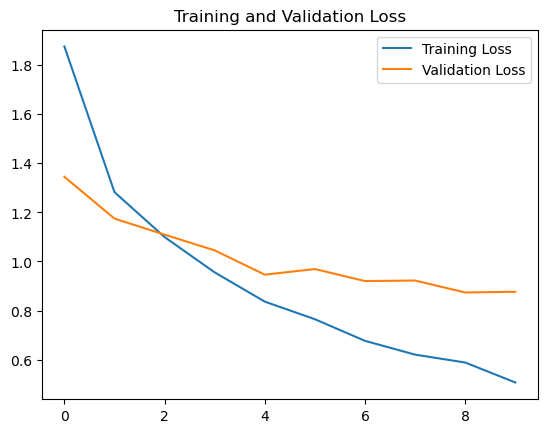

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold

# Define paths
train_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/small_dataset/64/Multiclass/train"
test_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/small_dataset/64/Multiclass/test"

# Data Preprocessing
image_size = (64, 64)
batch_size = 32
cv_folds = 10

# Image Data Generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
    base_model.trainable = False  # Freeze base model
    
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(7, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=out)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform Cross-Validation
kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(train_generator.filenames)):
    print(f"Training fold {fold+1}/{cv_folds}")
    
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')
    
    val_generator = datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')
    
    model = create_model()
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on Test Data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Sensitivity and Specificity
sensitivity = cm.diagonal() / cm.sum(axis=1)
specificity = cm.diagonal() / cm.sum(axis=0)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Loss Visualization
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()